In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Dataset**

In [ ]:
# https://drive.google.com/file/d/1_yHgExNg9hgjfcYi_Eg51SIydMz7Hsps/view?usp=sharing
dataku = pd.read_csv('Crop_recommendation.csv')

# https://www.kaggle.com/atharvaingle/crop-recommendation-dataset

In [ ]:
features = dataku[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = dataku['label']
labels = dataku['label']

In [ ]:
dataku

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Descriptive Statistics

In [ ]:
#ringkasan data
ringkasan = dataku.describe()
tipe_data = dataku.dtypes

In [ ]:
ringkasan

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
tipe_data

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
dataku.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
dataku['label'].nunique()

22

In [ ]:
dataku['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

## Histogram

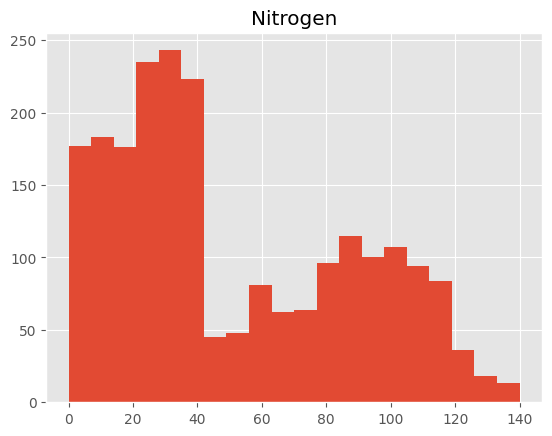

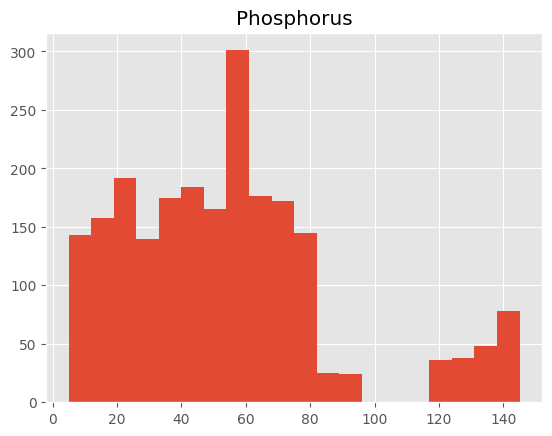

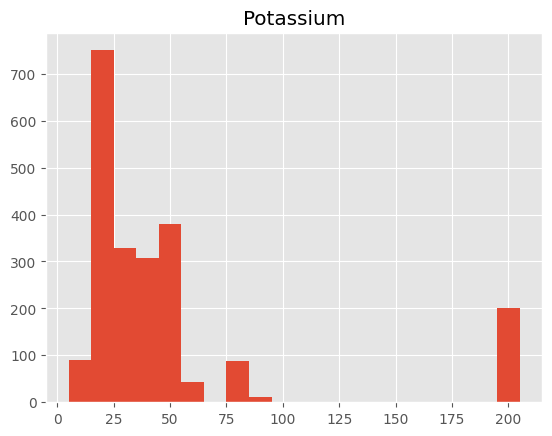

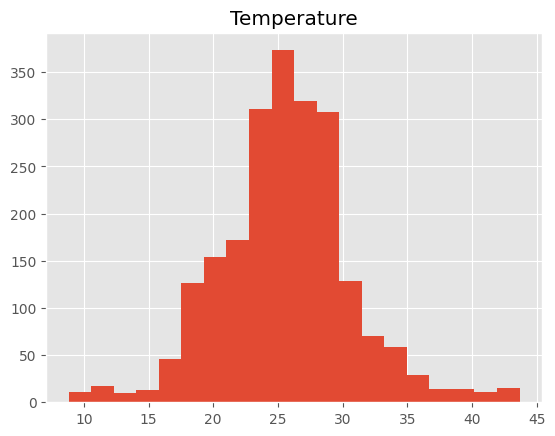

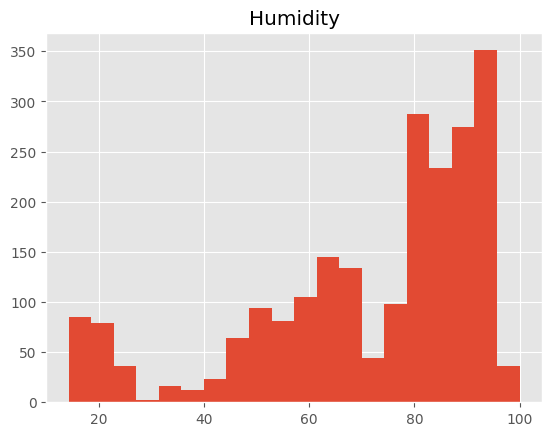

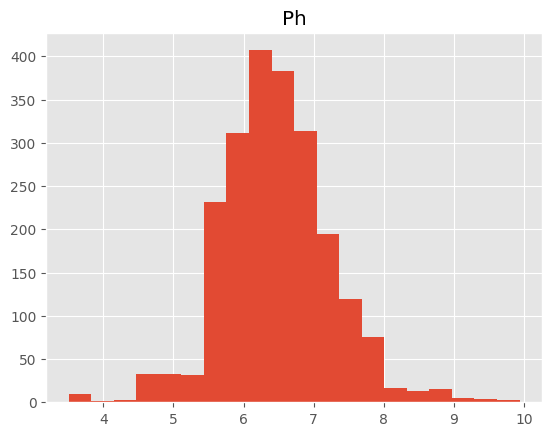

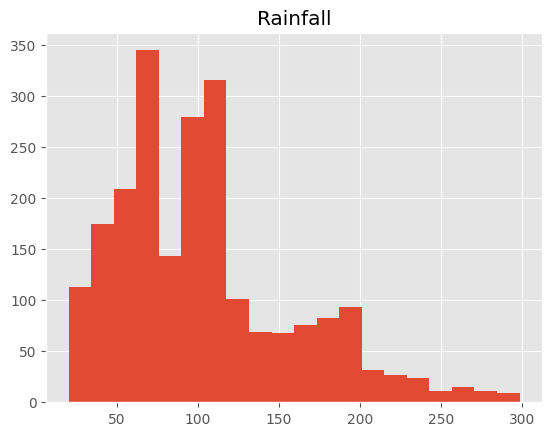

In [ ]:
plt.hist(dataku.N, bins=20)
plt.title("Nitrogen")
plt.show()

plt.hist(dataku.P, bins=20)
plt.title("Phosphorus")
plt.show()

plt.hist(dataku.K, bins=20)
plt.title("Potassium")
plt.show()

plt.hist(dataku.temperature, bins=20)
plt.title("Temperature")
plt.show()

plt.hist(dataku.humidity, bins=20)
plt.title("Humidity")
plt.show()

plt.hist(dataku.ph, bins=20)
plt.title("Ph")
plt.show()

plt.hist(dataku.rainfall, bins=20)
plt.title("Rainfall")
plt.show()

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

dataku.iloc[:,-1] = label_encoder.fit_transform(dataku.iloc[:,-1]).astype('float64')

list(label_encoder.inverse_transform([20, 21, 1]))

['rice', 'watermelon', 'banana']

In [ ]:
label_dict = {}
for i in range(dataku['label'].nunique()):
  label_dict[i] = label_encoder.inverse_transform([i])
label_dict

{0: array(['apple'], dtype=object),
 1: array(['banana'], dtype=object),
 2: array(['blackgram'], dtype=object),
 3: array(['chickpea'], dtype=object),
 4: array(['coconut'], dtype=object),
 5: array(['coffee'], dtype=object),
 6: array(['cotton'], dtype=object),
 7: array(['grapes'], dtype=object),
 8: array(['jute'], dtype=object),
 9: array(['kidneybeans'], dtype=object),
 10: array(['lentil'], dtype=object),
 11: array(['maize'], dtype=object),
 12: array(['mango'], dtype=object),
 13: array(['mothbeans'], dtype=object),
 14: array(['mungbean'], dtype=object),
 15: array(['muskmelon'], dtype=object),
 16: array(['orange'], dtype=object),
 17: array(['papaya'], dtype=object),
 18: array(['pigeonpeas'], dtype=object),
 19: array(['pomegranate'], dtype=object),
 20: array(['rice'], dtype=object),
 21: array(['watermelon'], dtype=object)}

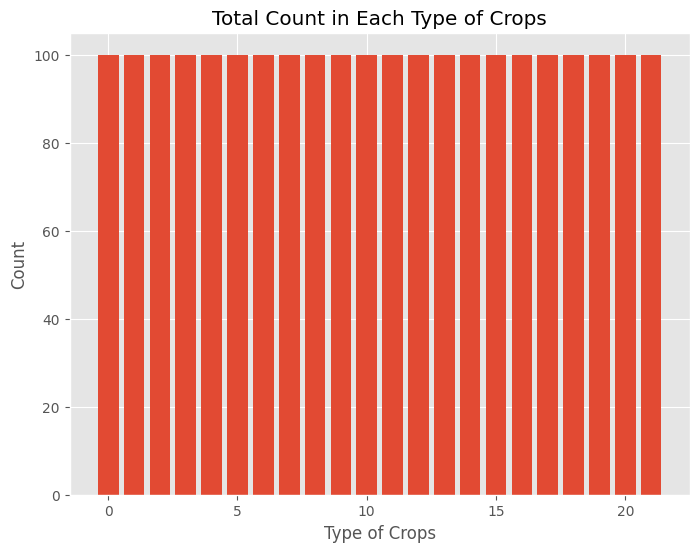

In [ ]:
label_counts = dataku['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Type of Crops')
plt.ylabel('Count')
plt.title('Total Count in Each Type of Crops')
plt.show()

## Correlation Test

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
label,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


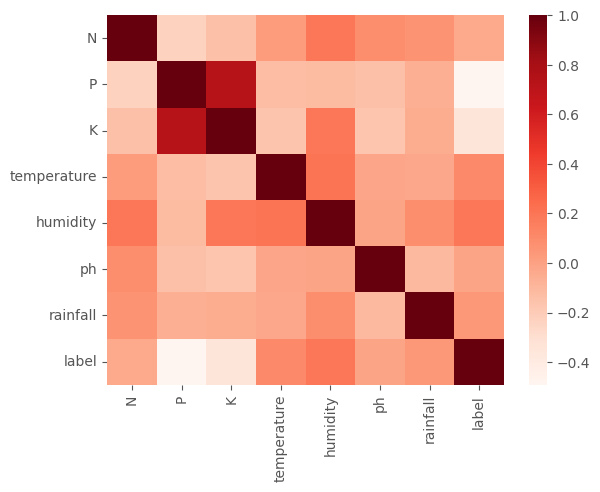

In [ ]:
matriks_korelasi = dataku.corr()
gambar1 = sns.heatmap(matriks_korelasi, cmap='Reds')
gambar1.figure.savefig( "korelasi.jpg")
matriks_korelasi

## Feature Selection

### By Correlation

In [ ]:
columns = np.full((matriks_korelasi.shape[0],), True, dtype=bool)
for i in range(matriks_korelasi.shape[0]):
    for j in range(i+1, matriks_korelasi.shape[0]):
        if matriks_korelasi.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = dataku.columns[columns]
data_selected = dataku[selected_columns]
selected_columns

Index(['N', 'P', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

### By P-value

In [ ]:
selected_columns = selected_columns[:-1].values

import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)

    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data_selected.iloc[:,:-1].values, data_selected.iloc[:,-1].values, SL, selected_columns)

In [ ]:
result = pd.DataFrame()
result['label'] = data_selected.iloc[:,-1]
result

,label
0,20.0
1,20.0
2,20.0
3,20.0
4,20.0
...,...
2195,5.0
2196,5.0
2197,5.0
2198,5.0


In [ ]:
dataku = pd.DataFrame(data = data_modeled, columns = selected_columns)
dataku['label'] = result

In [ ]:
result

,label
0,20.0
1,20.0
2,20.0
3,20.0
4,20.0
...,...
2195,5.0
2196,5.0
2197,5.0
2198,5.0


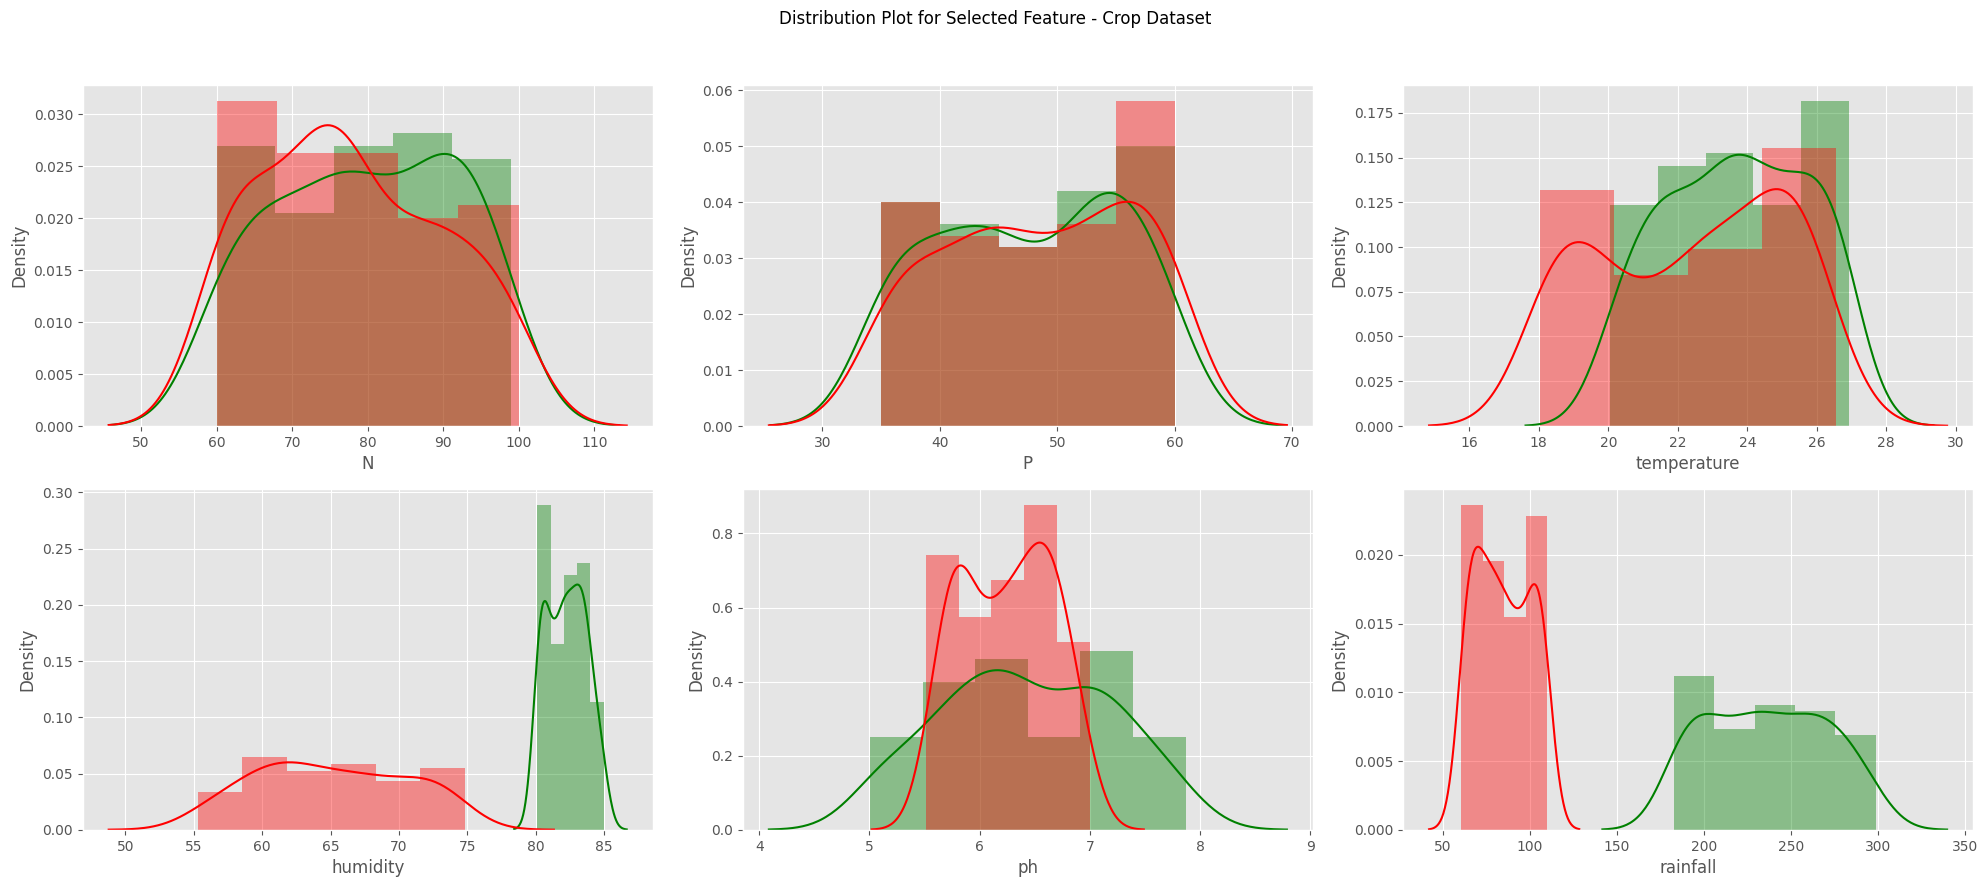

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in dataku.columns[:-1]:
    plt.subplot(6, 3, j+1)
    j += 1
    #for l in range (dataku['label'].nunique()):
      #sns.distplot(data[i][result['label']==l], label = label_dict[l])
    sns.distplot(dataku[i][result['label']==20], color='g', label = 'rice')
    sns.distplot(dataku[i][result['label']==11], color='r', label = 'maize')
fig.suptitle('Distribution Plot for Selected Feature - Crop Dataset')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# **Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dataku_scaled = pd.DataFrame(ss.fit_transform(dataku.iloc[:, :-1]))

In [ ]:
X = dataku_scaled
y = dataku.iloc[:, -1]

In [ ]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,
                                                            random_state=111)

X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,
                                                            test_size=0.2,
                                                            random_state=111)

# **Super Vector Machine (coef)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear', C = 1.0, decision_function_shape='ovo')


In [ ]:
clf.fit(X_train,y_train)

SVC(decision_function_shape='ovo', kernel='linear')

In [ ]:
n_features = X.shape[1]
gamma = 1 / (n_features * X.var())

clf._gamma

0.1691911269330452

In [ ]:
print(n_features)

6


In [ ]:
print(X.var())

0    1.000455
1    1.000455
2    1.000455
3    1.000455
4    1.000455
5    1.000455
dtype: float64


In [ ]:
print(gamma)

0    0.166591
1    0.166591
2    0.166591
3    0.166591
4    0.166591
5    0.166591
dtype: float64


In [ ]:
prediksi = clf.predict(X_test)

## Evaluasi SVM

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
akurasi = accuracy_score(y_test,prediksi)
acc.append(akurasi)
model.append('SVM')

In [ ]:
akurasi

0.9568181818181818

<Axes: xlabel='prediction', ylabel='actual'>

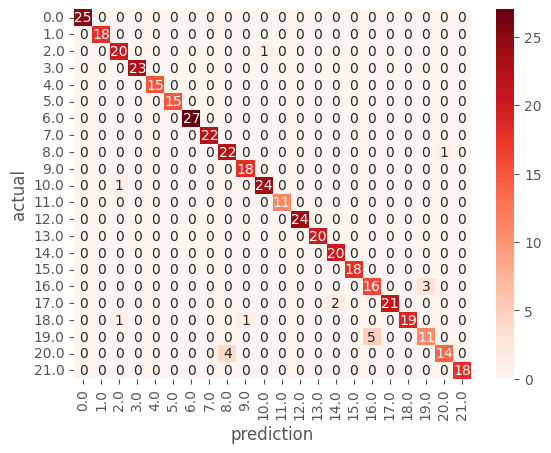

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediksi)
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),index=np.unique(y_test))
cm_label.index.name = 'actual'
cm_label.columns.name = 'prediction'

sns.heatmap(cm_label, annot=True, cmap='Reds', fmt='g')

In [ ]:
jumlah_kategori = 22
target_names = ['class{}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test, prediksi,target_names=target_names))

              precision    recall  f1-score   support

      class0       1.00      1.00      1.00        25
      class1       1.00      1.00      1.00        18
      class2       0.91      0.95      0.93        21
      class3       1.00      1.00      1.00        23
      class4       1.00      1.00      1.00        15
      class5       1.00      1.00      1.00        15
      class6       1.00      1.00      1.00        27
      class7       1.00      1.00      1.00        22
      class8       0.85      0.96      0.90        23
      class9       0.95      1.00      0.97        18
     class10       0.96      0.96      0.96        25
     class11       1.00      1.00      1.00        11
     class12       1.00      1.00      1.00        24
     class13       1.00      1.00      1.00        20
     class14       0.91      1.00      0.95        20
     class15       1.00      1.00      1.00        18
     class16       0.76      0.84      0.80        19
     class17       1.00    

## Feature Importance

In [ ]:
features_names = list(dataku.columns.values[0:7])
clf.coef_.shape

(231, 6)

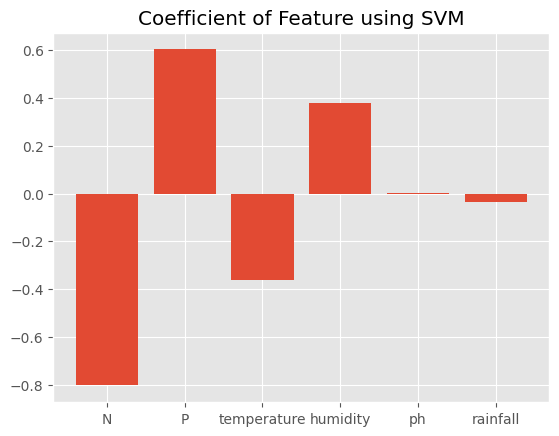

In [ ]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*(zip(imp,names)))
    plt.title("Coefficient of Feature using SVM")
    plt.bar(range(len(names)), imp, align='center')
    plt.xticks(range(len(names)), names)
    plt.show()

f_importances(clf.coef_[0], features_names)

In [ ]:
totalcoef = 0
for i in range(len(clf.coef_[0])):
  if clf.coef_[0][i] >= 0:
    totalcoef += clf.coef_[0][i]
  continue
totalcoef

0.9807622482954979

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

#print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9886363636363636


In [ ]:
# Cross validation score (Random Forest)
from sklearn.model_selection import cross_val_score
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [ ]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

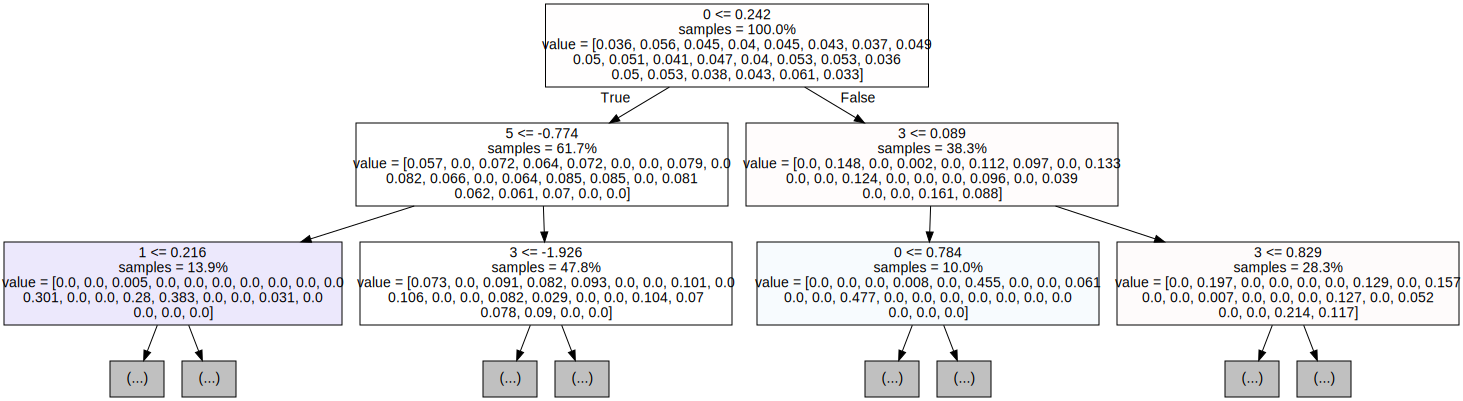

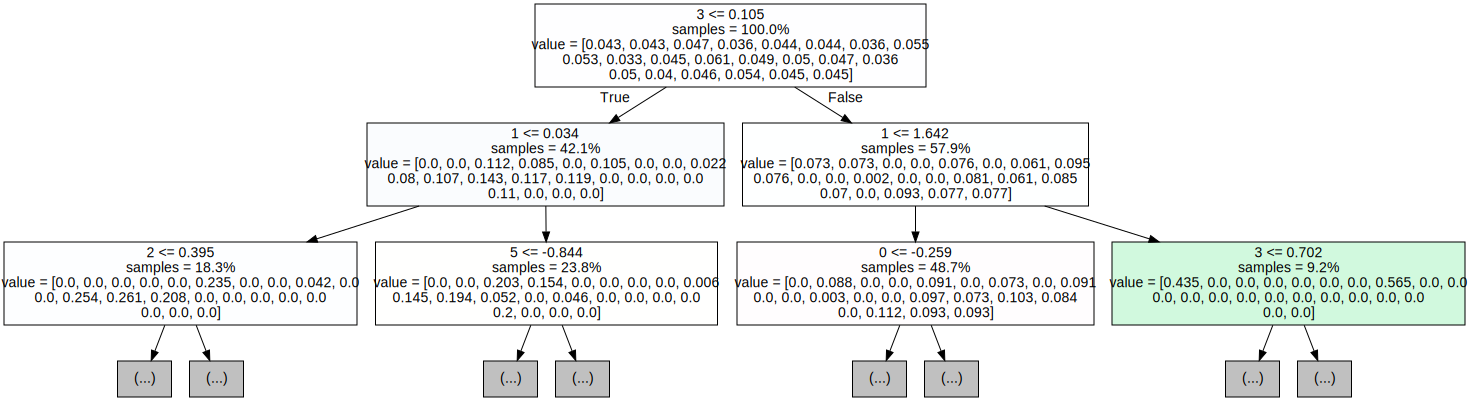

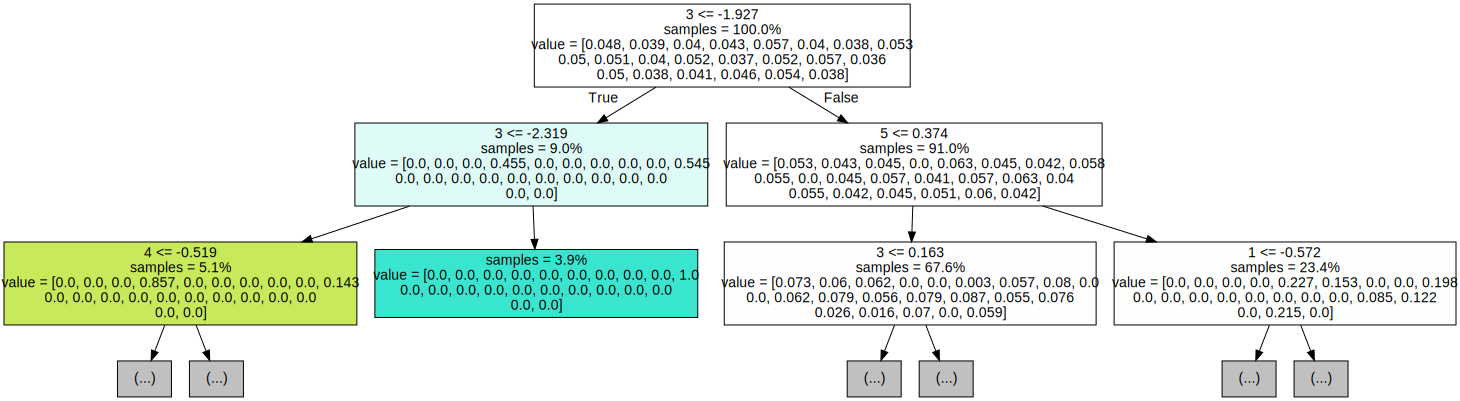

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = RF.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

2

<Axes: xlabel='prediction', ylabel='actual'>

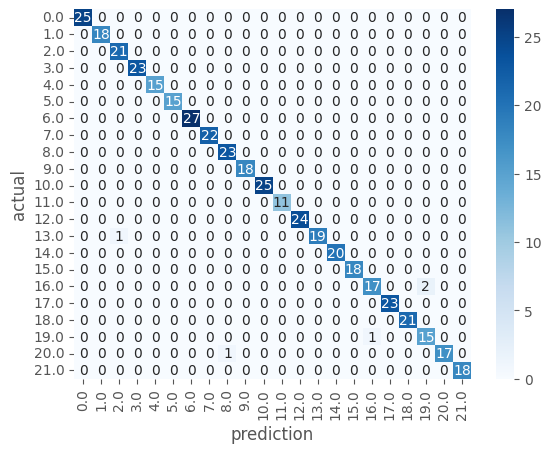

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),index=np.unique(y_test))
cm_label.index.name = 'actual'
cm_label.columns.name = 'prediction'

sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

In [ ]:
jumlah_kategori = 22
target_names = ['class{}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test, predicted_values,target_names=target_names))

              precision    recall  f1-score   support

      class0       1.00      1.00      1.00        25
      class1       1.00      1.00      1.00        18
      class2       0.95      1.00      0.98        21
      class3       1.00      1.00      1.00        23
      class4       1.00      1.00      1.00        15
      class5       1.00      1.00      1.00        15
      class6       1.00      1.00      1.00        27
      class7       1.00      1.00      1.00        22
      class8       0.96      1.00      0.98        23
      class9       1.00      1.00      1.00        18
     class10       1.00      1.00      1.00        25
     class11       1.00      1.00      1.00        11
     class12       1.00      1.00      1.00        24
     class13       1.00      0.95      0.97        20
     class14       1.00      1.00      1.00        20
     class15       1.00      1.00      1.00        18
     class16       0.94      0.89      0.92        19
     class17       1.00    

## Feature Importances

In [ ]:
feature_names = list(dataku.columns.values[0:-1])

In [ ]:
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)

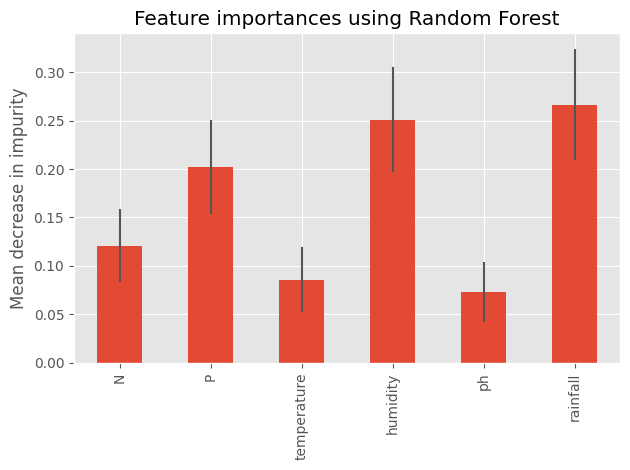

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Random Forest")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# **Logistic Regression (coef)**

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

#print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.9340909090909091


In [ ]:
print(LogReg.coef_, LogReg.intercept_)

[[-1.3693131   4.02943905 -0.09481063  2.78666292 -1.19803474  2.17720206]
 [ 2.98013351  3.29838449  0.77300919  1.02057186 -1.35078671  0.59164863]
 [ 0.01818982  1.9119034   1.25412252 -1.04101894  0.82837666 -0.64344867]
 [ 0.64055399  0.70628151 -2.06634282 -4.82890352  1.34870484 -0.77201581]
 [-1.85676402 -2.8788001   0.80139259  2.44680316 -1.26885854  3.35811752]
 [ 2.94650447 -2.76400778  0.49086772 -3.15589179  0.56989188  2.15169647]
 [ 4.43712508  0.71023294 -1.61122306  1.16131409  1.14889684 -0.47555334]
 [-0.79490308  5.10035711  0.11501435  0.20140136 -0.6770001  -2.78749873]
 [ 1.35478124  0.10471879 -0.05353891  0.93380542  0.51462018  2.62332155]
 [-1.21662573  0.88190801 -1.11881369 -4.21456446 -0.81390431  0.60430422]
 [-2.11734227  1.74508864 -0.90556426 -1.0256059   0.47103669 -4.30864495]
 [ 1.58687049 -0.08032153 -1.58679623 -1.48053607 -0.35586558 -0.25832659]
 [-1.783809   -3.50404467  1.33461645 -2.69263168 -0.29285327  0.50845154]
 [-1.75576559 -1.9505917 

In [ ]:
LogReg.intercept_

array([-0.66981641,  0.70011773,  2.84959857, -2.30750234, -1.42865628,
       -0.05303376, -0.94342433, -1.67664525,  2.57224738, -0.96796603,
       -0.17703247,  3.51231984,  0.66115297, -1.07178103, -0.04630579,
       -3.94632871,  0.30622276,  1.34035212,  1.96307727,  1.87069681,
       -2.5306813 ,  0.04338826])

In [ ]:
LogReg.coef_

array([[-1.3693131 ,  4.02943905, -0.09481063,  2.78666292, -1.19803474,
         2.17720206],
       [ 2.98013351,  3.29838449,  0.77300919,  1.02057186, -1.35078671,
         0.59164863],
       [ 0.01818982,  1.9119034 ,  1.25412252, -1.04101894,  0.82837666,
        -0.64344867],
       [ 0.64055399,  0.70628151, -2.06634282, -4.82890352,  1.34870484,
        -0.77201581],
       [-1.85676402, -2.8788001 ,  0.80139259,  2.44680316, -1.26885854,
         3.35811752],
       [ 2.94650447, -2.76400778,  0.49086772, -3.15589179,  0.56989188,
         2.15169647],
       [ 4.43712508,  0.71023294, -1.61122306,  1.16131409,  1.14889684,
        -0.47555334],
       [-0.79490308,  5.10035711,  0.11501435,  0.20140136, -0.6770001 ,
        -2.78749873],
       [ 1.35478124,  0.10471879, -0.05353891,  0.93380542,  0.51462018,
         2.62332155],
       [-1.21662573,  0.88190801, -1.11881369, -4.21456446, -0.81390431,
         0.60430422],
       [-2.11734227,  1.74508864, -0.90556426, -1.

In [ ]:
LogReg.predict_proba(X_train)

array([[6.97587253e-06, 3.26048530e-06, 6.61483076e-04, ...,
        1.09155863e-01, 2.26495932e-06, 2.56143102e-03],
       [5.62273013e-03, 9.65350924e-01, 3.46528177e-03, ...,
        4.40648878e-06, 1.87810752e-04, 1.49122583e-05],
       [8.27594549e-10, 2.98200505e-08, 1.69475989e-04, ...,
        1.26087644e-06, 6.77649887e-09, 3.66108963e-07],
       ...,
       [7.51060465e-08, 4.96759860e-07, 7.58632919e-05, ...,
        4.87087658e-06, 1.50695840e-06, 1.83834210e-07],
       [1.88754141e-03, 8.39630515e-03, 4.76440099e-03, ...,
        1.31727039e-03, 1.28514836e-01, 3.53104139e-04],
       [3.20294550e-04, 9.44162649e-01, 1.17132828e-03, ...,
        9.54039805e-07, 3.17331927e-05, 9.79168558e-05]])

In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

<Axes: xlabel='prediction', ylabel='actual'>

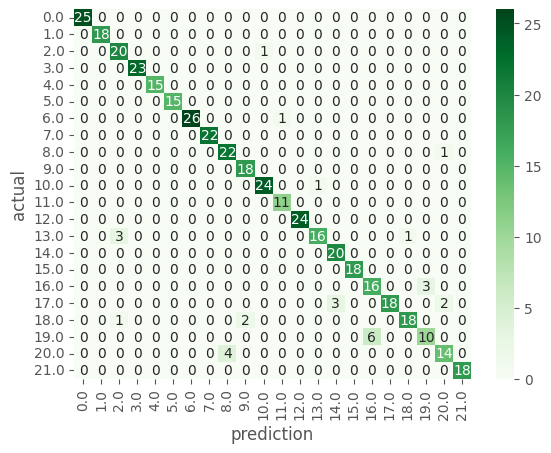

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),index=np.unique(y_test))
cm_label.index.name = 'actual'
cm_label.columns.name = 'prediction'

sns.heatmap(cm_label, annot=True, cmap='Greens', fmt='g')

In [ ]:
jumlah_kategori = 22
target_names = ['class{}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test, predicted_values,target_names=target_names))

              precision    recall  f1-score   support

      class0       1.00      1.00      1.00        25
      class1       1.00      1.00      1.00        18
      class2       0.83      0.95      0.89        21
      class3       1.00      1.00      1.00        23
      class4       1.00      1.00      1.00        15
      class5       1.00      1.00      1.00        15
      class6       1.00      0.96      0.98        27
      class7       1.00      1.00      1.00        22
      class8       0.85      0.96      0.90        23
      class9       0.90      1.00      0.95        18
     class10       0.96      0.96      0.96        25
     class11       0.92      1.00      0.96        11
     class12       1.00      1.00      1.00        24
     class13       0.94      0.80      0.86        20
     class14       0.87      1.00      0.93        20
     class15       1.00      1.00      1.00        18
     class16       0.73      0.84      0.78        19
     class17       1.00    

## Feature Importances

In [ ]:
feature_names = list(dataku.columns.values[0:-1])

Feature: 0, Score: -1.36931
Feature: 1, Score: 4.02944
Feature: 2, Score: -0.09481
Feature: 3, Score: 2.78666
Feature: 4, Score: -1.19803
Feature: 5, Score: 2.17720


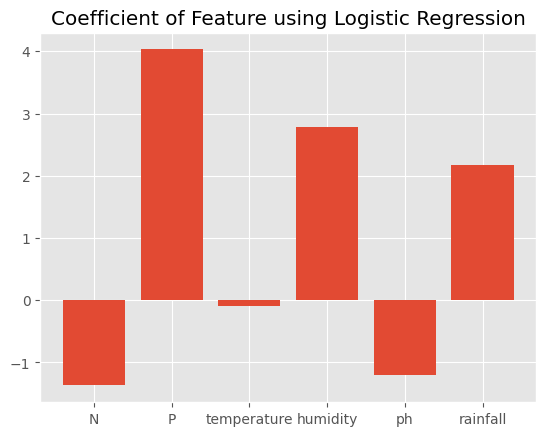

In [ ]:
from matplotlib import pyplot

importances = LogReg.coef_[0]
# summarize feature importance
for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar(feature_names, importances)
pyplot.title("Coefficient of Feature using Logistic Regression")
pyplot.show()

In [ ]:
totalcoef = 0
for i in range(len(LogReg.coef_[0])):
  if LogReg.coef_[0][i] >= 0:
    totalcoef += LogReg.coef_[0][i]
  continue
totalcoef

8.99330403657634

# **XG Boost (Gradient Bossting)**

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

#print(classification_report(y_test,predicted_values))

XGBoost's Accuracy is:  0.9886363636363636


In [ ]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

ValueError: ignored

## Feature Importances

In [ ]:
feature_names = list(dataku.columns.values[0:-1])

In [ ]:
importances = XB.feature_importances_

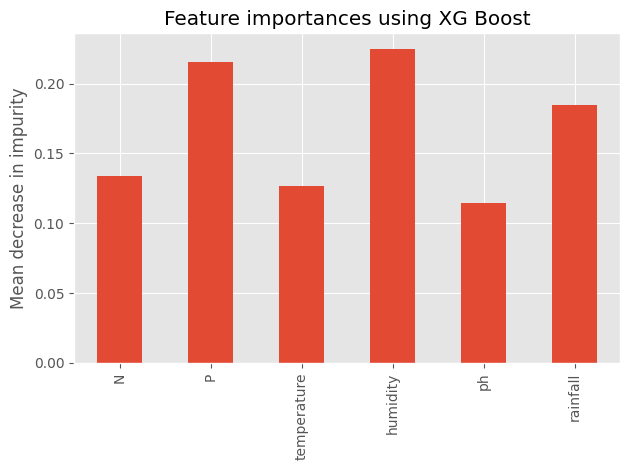

In [ ]:
XB_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
XB_importances.plot.bar()
ax.set_title("Feature importances using XG Boost")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# **Neural Network**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataku['label'] = label_encoder.fit_transform(dataku['label'])

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dataku_scaled = pd.DataFrame(ss.fit_transform(dataku.iloc[:, :-1]))

In [ ]:
X = dataku_scaled
y = dataku.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,
                                                            random_state=111)

X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,
                                                            test_size=0.2,
                                                            random_state=111)

In [ ]:
X = dataku_scaled
y = dataku.iloc[:, -1]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
classifier = Sequential()
classifier.add(Dense(units=10, input_dim=(len(list(dataku.columns.values[0:-1]))), activation='relu'))
classifier.add(Dense(units=14, activation='relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units=18, activation='relu'))
classifier.add(Dense(units=20, activation='relu'))
classifier.add(Dense(units=22, activation='sigmoid'))
classifier.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                70        
                                                                 
 dense_6 (Dense)             (None, 14)                154       
                                                                 
 dropout_1 (Dropout)         (None, 14)                0         
                                                                 
 dense_7 (Dense)             (None, 18)                270       
                                                                 
 dense_8 (Dense)             (None, 20)                380       
                                                                 
 dense_9 (Dense)             (None, 22)                462       
                                                                 
Total params: 1336 (5.22 KB)
Trainable params: 1336 (5

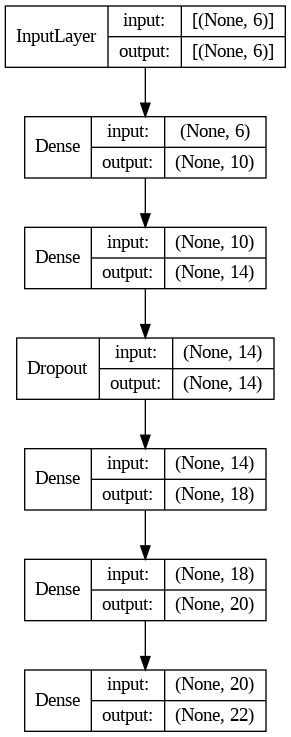

In [ ]:
#from tensorflow.python.keras.utils.np_utils import to_categorical
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
plot_model(classifier, to_file ='model_ann.png', show_shapes=True,show_layer_names=False)

In [ ]:
history = classifier.fit(X_train, y_train,
                           batch_size = 32,
                           epochs= 100,
                           verbose = 1,
                           validation_data = (X_validate, y_validate,))

Epoch 1/100
44/44 [==============================] - 1s 5ms/step - loss: 3.0503 - accuracy: 0.0632 - val_loss: 3.0063 - val_accuracy: 0.1051
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 2.9255 - accuracy: 0.1328 - val_loss: 2.8254 - val_accuracy: 0.1733
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 2.7098 - accuracy: 0.1811 - val_loss: 2.5405 - val_accuracy: 0.2415
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 2.4061 - accuracy: 0.2408 - val_loss: 2.1658 - val_accuracy: 0.3324
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 2.0511 - accuracy: 0.2955 - val_loss: 1.7594 - val_accuracy: 0.4233
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 1.7264 - accuracy: 0.3786 - val_loss: 1.4050 - val_accuracy: 0.5398
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 1.5167 - accuracy: 0.4695 - val_loss: 1.1809 - val_accuracy: 0.6136
Epoch 8/100
4

In [ ]:
predicted_values = np.argmax(classifier.predict(X_test), axis=-1)

14/14 [==============================] - 0s 1ms/step


In [ ]:
jumlah_kategori = 22
target_names = ['class{}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test, predicted_values,target_names=target_names))

              precision    recall  f1-score   support

      class0       1.00      1.00      1.00        25
      class1       1.00      1.00      1.00        18
      class2       0.84      1.00      0.91        21
      class3       0.88      1.00      0.94        23
      class4       1.00      1.00      1.00        15
      class5       1.00      0.93      0.97        15
      class6       1.00      1.00      1.00        27
      class7       1.00      1.00      1.00        22
      class8       0.82      1.00      0.90        23
      class9       0.94      0.83      0.88        18
     class10       1.00      0.96      0.98        25
     class11       0.92      1.00      0.96        11
     class12       1.00      1.00      1.00        24
     class13       1.00      0.85      0.92        20
     class14       0.87      1.00      0.93        20
     class15       0.86      1.00      0.92        18
     class16       0.71      0.79      0.75        19
     class17       1.00    

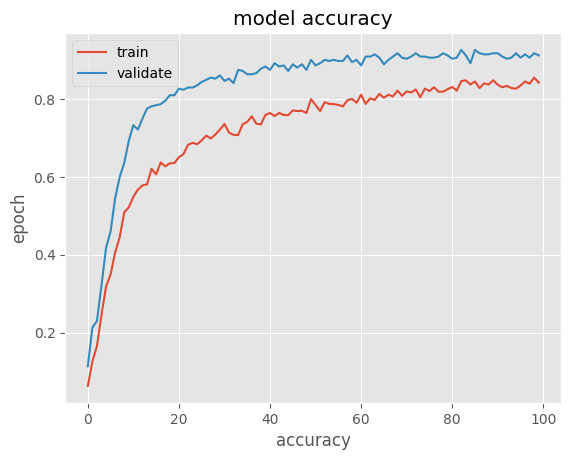

In [ ]:
plt.plot(run_model.history['accuracy'])
plt.plot(run_model.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','validate'], loc ='upper left')
plt.show()

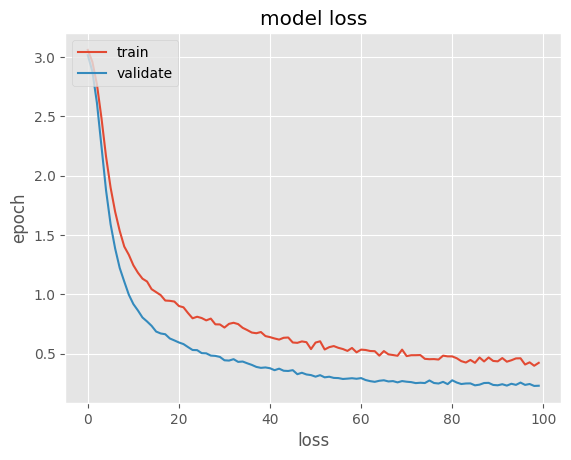

In [ ]:
plt.plot(run_model.history['loss'])
plt.plot(run_model.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','validate'], loc ='upper left')
plt.show()

In [ ]:
evaluasi = classifier.evaluate(X_test,y_test)
acc.append(evaluasi[-1])
model.append('Neural Network')


14/14 [==============================] - 0s 1ms/step - loss: 0.2269 - accuracy: 0.9273


In [ ]:
evaluasi

[0.22687086462974548, 0.9272727370262146]

In [ ]:
print('akurasi:{:.2f}'.format(evaluasi[1]*100))

akurasi:92.73


<Axes: xlabel='prediction', ylabel='actual'>

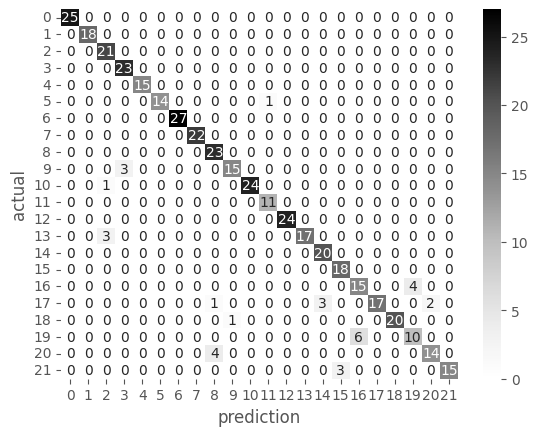

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),index=np.unique(y_test))
cm_label.index.name = 'actual'
cm_label.columns.name = 'prediction'

sns.heatmap(cm_label, annot=True, cmap='Greys', fmt='g')

In [ ]:
y_train

1682    16
1068     1
208      3
677     14
1339    21
        ..
1529     0
66      20
323      9
2089     8
1051     1
Name: label, Length: 1408, dtype: int64

In [ ]:
y_test

952     19
421     18
2031     8
1214     7
239      3
        ..
1138    12
1049     1
1145    12
852     10
1325    21
Name: label, Length: 440, dtype: int64

In [ ]:
X_validate

,0,1,2,3,4,5
1053,1.150079,0.838042,0.415198,0.228977,-0.560122,-0.022816
1995,1.691953,-0.465842,-0.693133,0.319040,-0.135378,-0.519098
1749,-0.312982,0.322553,0.652270,1.040264,0.270388,-0.723907
751,-0.475544,0.807719,0.583459,-0.258960,0.160879,-0.607452
593,-0.881949,-0.526488,-0.315646,-0.795891,0.962310,-1.245400
...,...,...,...,...,...,...
514,-0.746481,-0.253582,1.155310,-0.884254,3.251476,-0.528162
775,-0.204607,0.231584,0.248020,-0.443336,0.432657,-0.726996
397,-0.367169,0.504490,-1.162422,-2.092970,-0.840150,-0.353077
1512,-1.017418,2.202572,-0.495164,0.957580,-0.111533,0.085905


## Feature Importances

In [ ]:
feature_names = list(dataku.columns.values[0:-1])

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=901f47444881c3ae9674f569fe5385bc1a62619821aa4f21636a9244b3c5a655
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
pip install scikeras

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed
from keras.optimizers import RMSprop
from scikeras.wrappers import KerasRegressor
from keras import optimizers

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def regression_model():
    # Define model
    model = Sequential()
    model.add(Dense(5, input_dim=5, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(1, activation='linear'))
    # Compile model
    adam = optimizers.Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=adam,metrics=['accuracy'])

    return model

# Use KerasRegressor wrapper (from Keras to sklearn)
# The packages we use are meant to be run with sklearn models
estimator = KerasRegressor(build_fn=regression_model, validation_split = 0.2, batch_size=100, epochs=100, verbose=0)


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# Imports
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Create a classifier
clf = MLPClassifier(hidden_layer_sizes=(8, 4), learning_rate_init=0.01)
# Fit the classifier using the training set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Evaluate the classifier using the test set
acc = accuracy_score(y_test, y_pred)
print(acc)

0.875


In [ ]:
def get_feature_importance(j, n):
  s = accuracy_score(y_test, y_pred) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = clf.predict(X_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    total += s_ij
  return s - total / n

In [ ]:
# Feature importances
f = []
for j in range(X_test.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)
# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(X_test.shape[1]), f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test.shape[1]))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances (Iris data set)")
plt.show()

InvalidIndexError: ignored

In [ ]:
# Evaluate the classifier using the test set
acc = accuracy_score(y_test, y_prediction)
print(acc)

NameError: ignored

In [ ]:
def get_feature_importance(j, n):
  s = accuracy_score(y_test, y_pred) # baseline score
  total = 0.0
  for i in range(n):
    perm = np.random.permutation(range(X_test.shape[0]))
    X_test_ = X_test.copy()
    X_test_[:, j] = X_test[perm, j]
    y_pred_ = clf.predict(X_test_)
    s_ij = accuracy_score(y_test, y_pred_)
    total += s_ij
  return s - total / n

In [ ]:
# Feature importances
f = []
for j in range(X_test.shape[1]):
  f_j = get_feature_importance(j, 100)
  f.append(f_j)
# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(X_test.shape[1]), f, color="r", alpha=0.7)
plt.xticks(ticks=range(X_test.shape[1]))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature importances (Iris data set)")
plt.show()

NameError: ignored

In [ ]:
perm = PermutationImportance(classifier, random_state=1, scoring='neg_mean_squared_error').fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

44/44 [==============================] - 0s 2ms/step


ValueError: ignored

# **Komparasi**

In [ ]:
dattt = pd.DataFrame({
    'SVM':[0.96, 0.95, 0.95, 0.96],
    'Random Forest':[0.99, 0.99, 0.99, 0.99],
    'Logistic Regression':[0.93, 0.93, 0.93, 0.934091],
    'Neural Network':[0.93, 0.92, 0.92, 0.92727]},
    index=["Precision", "Recall", "F1-Score", "Accuracy"])

print(dattt)


            SVM  Random Forest  Logistic Regression  Neural Network
Precision  0.96           0.99             0.930000         0.93000
Recall     0.95           0.99             0.930000         0.92000
F1-Score   0.95           0.99             0.930000         0.92000
Accuracy   0.96           0.99             0.934091         0.92727


Text(0, 0.5, 'Score (%)')

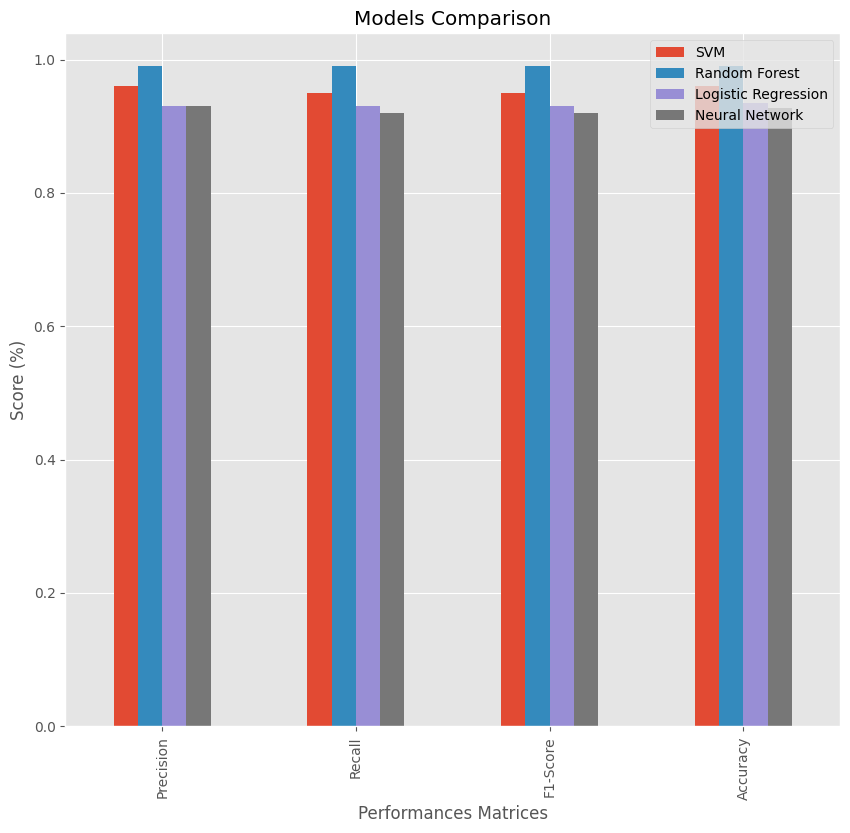

In [ ]:
dattt.plot(kind="bar",figsize=(10, 9))

plt.title("Models Comparison")

plt.xlabel("Performances Matrices")

plt.ylabel("Score (%)")

[Text(0, 0, '0.956818'),
 Text(0, 0, '0.988636'),
 Text(0, 0, '0.934091'),
 Text(0, 0, '0.931818')]

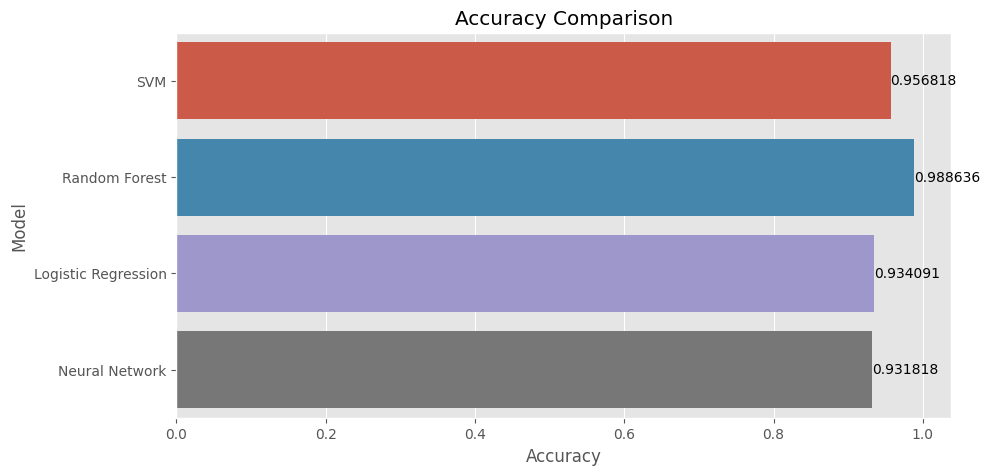

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
ax = sns.barplot(x='Accuracy', y='Model', data=df, errwidth=0)

# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])

In [ ]:
acc

[0.9568181818181818,
 0.9886363636363636,
 0.9340909090909091,
 0.9272727370262146]

In [ ]:
model

['SVM', 'RF', 'Logistic Regression', 'Neural Network']

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

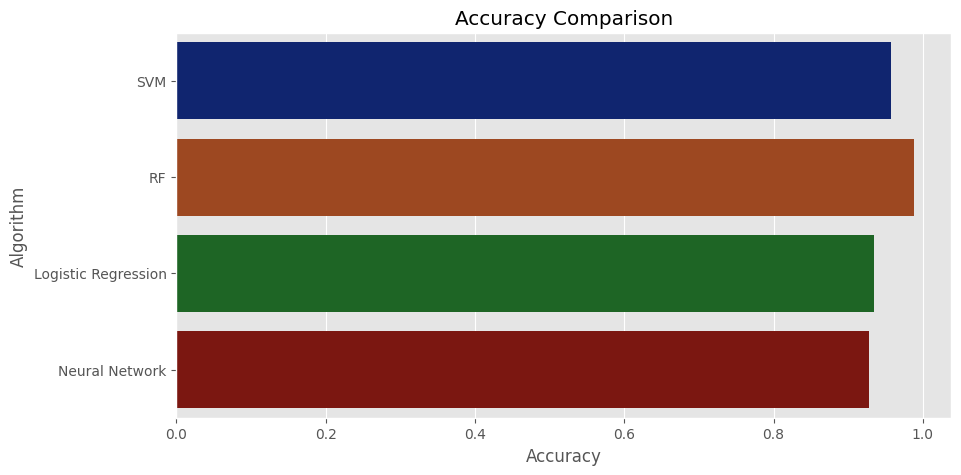

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')